In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline

In [18]:
rhpass=pd.read_csv("allatttack_freebsd_tcpdump.csv", parse_dates=['Time'])
rhpass.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,2011-11-18 10:23:59,Tp-LinkT_b5:79:3f,Broadcast,ARP,60,Who has 10.10.10.10? Tell 10.10.10.15
1,2,2011-11-18 10:23:59,Hewlett-_f3:37:a7,Tp-LinkT_b5:79:3f,ARP,42,10.10.10.10 is at 00:11:85:f3:37:a7
2,3,2011-11-18 10:23:59,10.10.10.15,10.10.10.10,ICMP,106,"Echo (ping) request id=0x0200, seq=9217/292, ..."
3,4,2011-11-18 10:23:59,10.10.10.10,10.10.10.15,ICMP,106,"Echo (ping) reply id=0x0200, seq=9217/292, ..."
4,5,2011-11-18 10:23:59,Tp-LinkT_b5:79:3f,Broadcast,ARP,60,Who has 10.10.10.1? Tell 10.10.10.15


In [19]:
rhpass["Type"] = rhpass.apply(lambda x: "Client" if x["Source"] == rhpass.irow(0)["Source"] else "Server", axis=1)

In [20]:
rhpass.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Type
0,1,2011-11-18 10:23:59,Tp-LinkT_b5:79:3f,Broadcast,ARP,60,Who has 10.10.10.10? Tell 10.10.10.15,Client
1,2,2011-11-18 10:23:59,Hewlett-_f3:37:a7,Tp-LinkT_b5:79:3f,ARP,42,10.10.10.10 is at 00:11:85:f3:37:a7,Server
2,3,2011-11-18 10:23:59,10.10.10.15,10.10.10.10,ICMP,106,"Echo (ping) request id=0x0200, seq=9217/292, ...",Server
3,4,2011-11-18 10:23:59,10.10.10.10,10.10.10.15,ICMP,106,"Echo (ping) reply id=0x0200, seq=9217/292, ...",Server
4,5,2011-11-18 10:23:59,Tp-LinkT_b5:79:3f,Broadcast,ARP,60,Who has 10.10.10.1? Tell 10.10.10.15,Client


In [21]:
infodata2 = rhpass[['Length','Time','Info']]
infodata2.head()

,Length,Time,Info
0,60,2011-11-18 10:23:59,Who has 10.10.10.10? Tell 10.10.10.15
1,42,2011-11-18 10:23:59,10.10.10.10 is at 00:11:85:f3:37:a7
2,106,2011-11-18 10:23:59,"Echo (ping) request id=0x0200, seq=9217/292, ..."
3,106,2011-11-18 10:23:59,"Echo (ping) reply id=0x0200, seq=9217/292, ..."
4,60,2011-11-18 10:23:59,Who has 10.10.10.1? Tell 10.10.10.15


In [22]:
infodata2 = infodata2.set_index('Time')
infodata2.head()

,Length,Info
Time,,
2011-11-18 10:23:59,60,Who has 10.10.10.10? Tell 10.10.10.15
2011-11-18 10:23:59,42,10.10.10.10 is at 00:11:85:f3:37:a7
2011-11-18 10:23:59,106,"Echo (ping) request id=0x0200, seq=9217/292, ..."
2011-11-18 10:23:59,106,"Echo (ping) reply id=0x0200, seq=9217/292, ..."
2011-11-18 10:23:59,60,Who has 10.10.10.1? Tell 10.10.10.15


In [23]:
infodata2.resample('T',how=sum).head()

,Length
Time,
2011-11-18 10:23:00,536
2011-11-18 10:24:00,49650
2011-11-18 10:25:00,53878
2011-11-18 10:26:00,440291
2011-11-18 10:27:00,980736


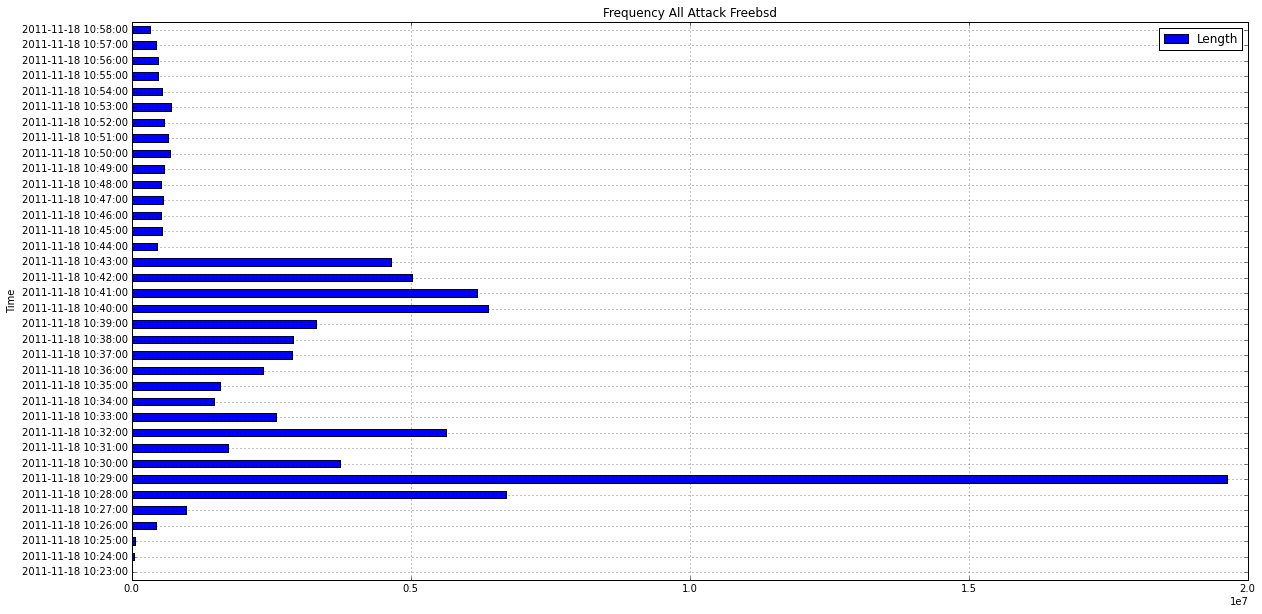

In [24]:
infodata2_plot = infodata2.resample('T',how=sum).plot(kind="barh",title="Frequency All Attack Freebsd",figsize=(20,10),legend=True)

In [25]:
fig = infodata2_plot.get_figure()
fig.savefig("Frekuensi All Attack Freebsd.png")

In [26]:
rhpass.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Type
0,1,2011-11-18 10:23:59,Tp-LinkT_b5:79:3f,Broadcast,ARP,60,Who has 10.10.10.10? Tell 10.10.10.15,Client
1,2,2011-11-18 10:23:59,Hewlett-_f3:37:a7,Tp-LinkT_b5:79:3f,ARP,42,10.10.10.10 is at 00:11:85:f3:37:a7,Server
2,3,2011-11-18 10:23:59,10.10.10.15,10.10.10.10,ICMP,106,"Echo (ping) request id=0x0200, seq=9217/292, ...",Server
3,4,2011-11-18 10:23:59,10.10.10.10,10.10.10.15,ICMP,106,"Echo (ping) reply id=0x0200, seq=9217/292, ...",Server
4,5,2011-11-18 10:23:59,Tp-LinkT_b5:79:3f,Broadcast,ARP,60,Who has 10.10.10.1? Tell 10.10.10.15,Client


In [27]:
category_group=rhpass.groupby(['Source','Destination','Protocol']).sum()
category_group.head()

No.   Length
Source      Destination Protocol                     
10.10.10.10 10.10.10.15 HTTP      3636303496  7199001
                        ICMP        53325123    26982
                        MDNS         2209618      881
                        MySQL        4171437     1551
                        SSH          2309924     1214

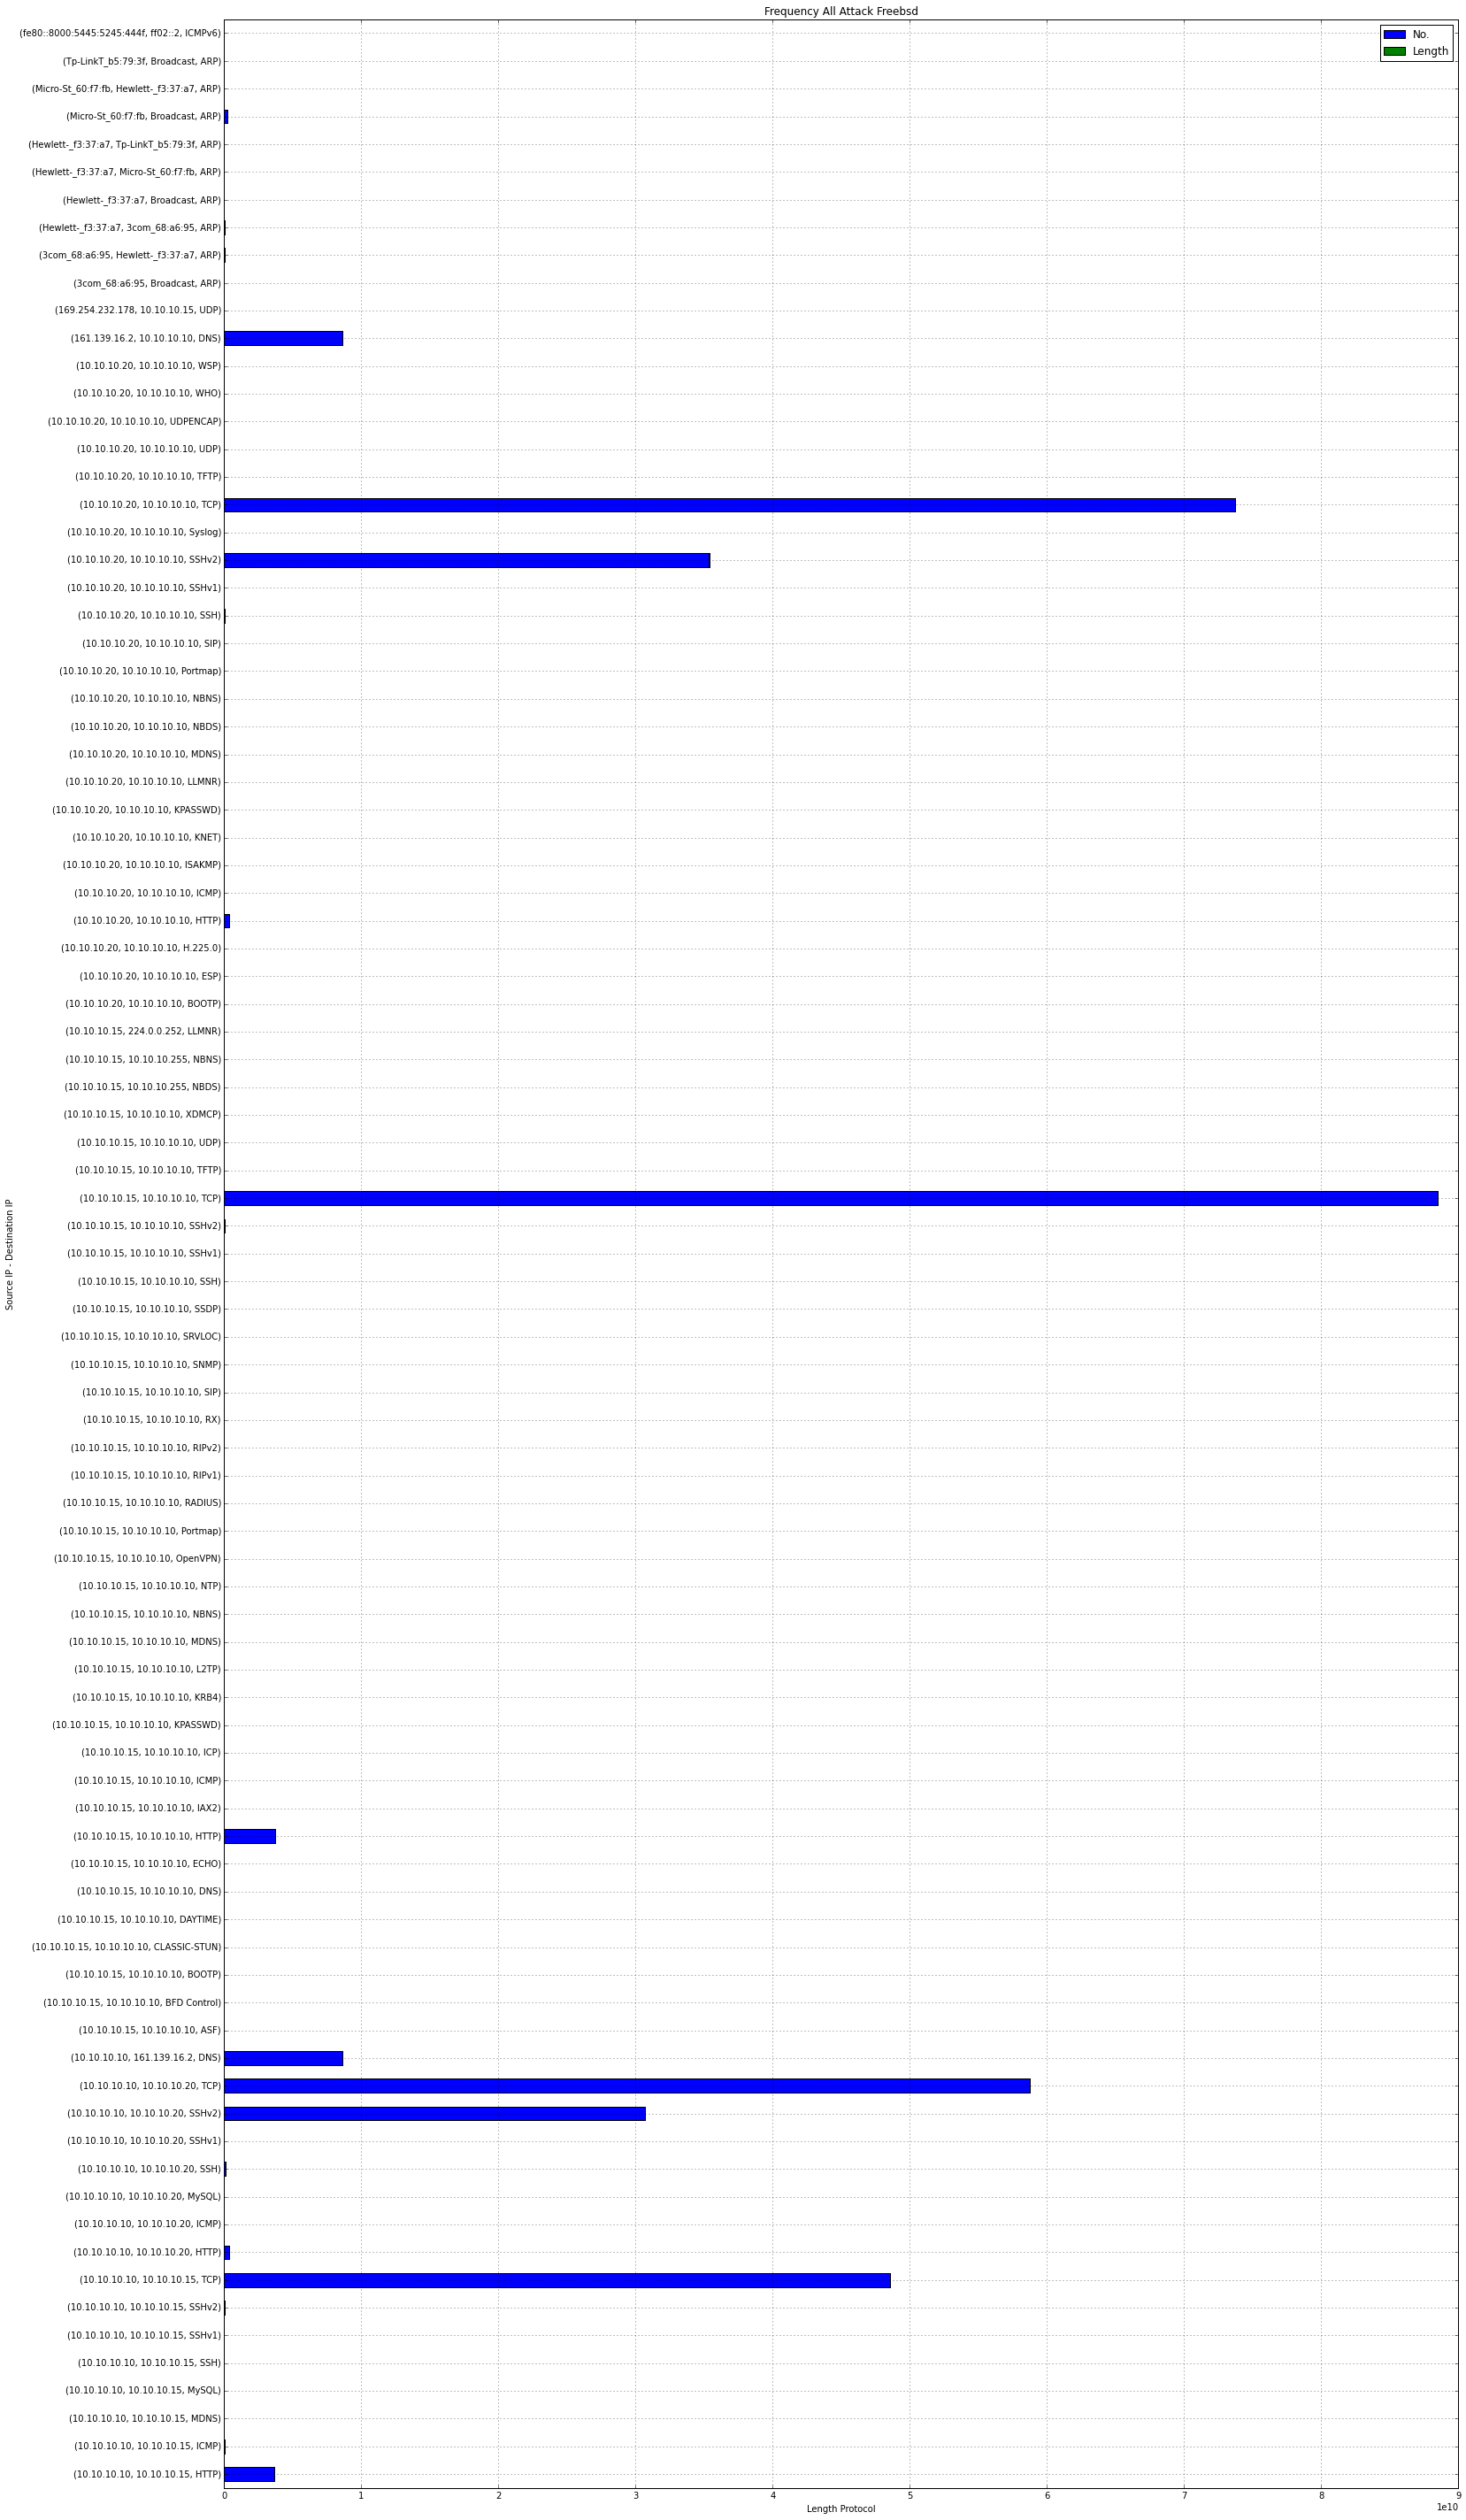

In [28]:
my_plot = category_group.plot(kind='barh',stacked=True,title="Frequency All Attack Freebsd",figsize=(25,50))
my_plot.set_xlabel("Length Protocol")
my_plot.set_ylabel("Source IP - Destination IP")

In [29]:
fig = infodata2_plot.get_figure()
fig.savefig("Frekuensi Sn.png")

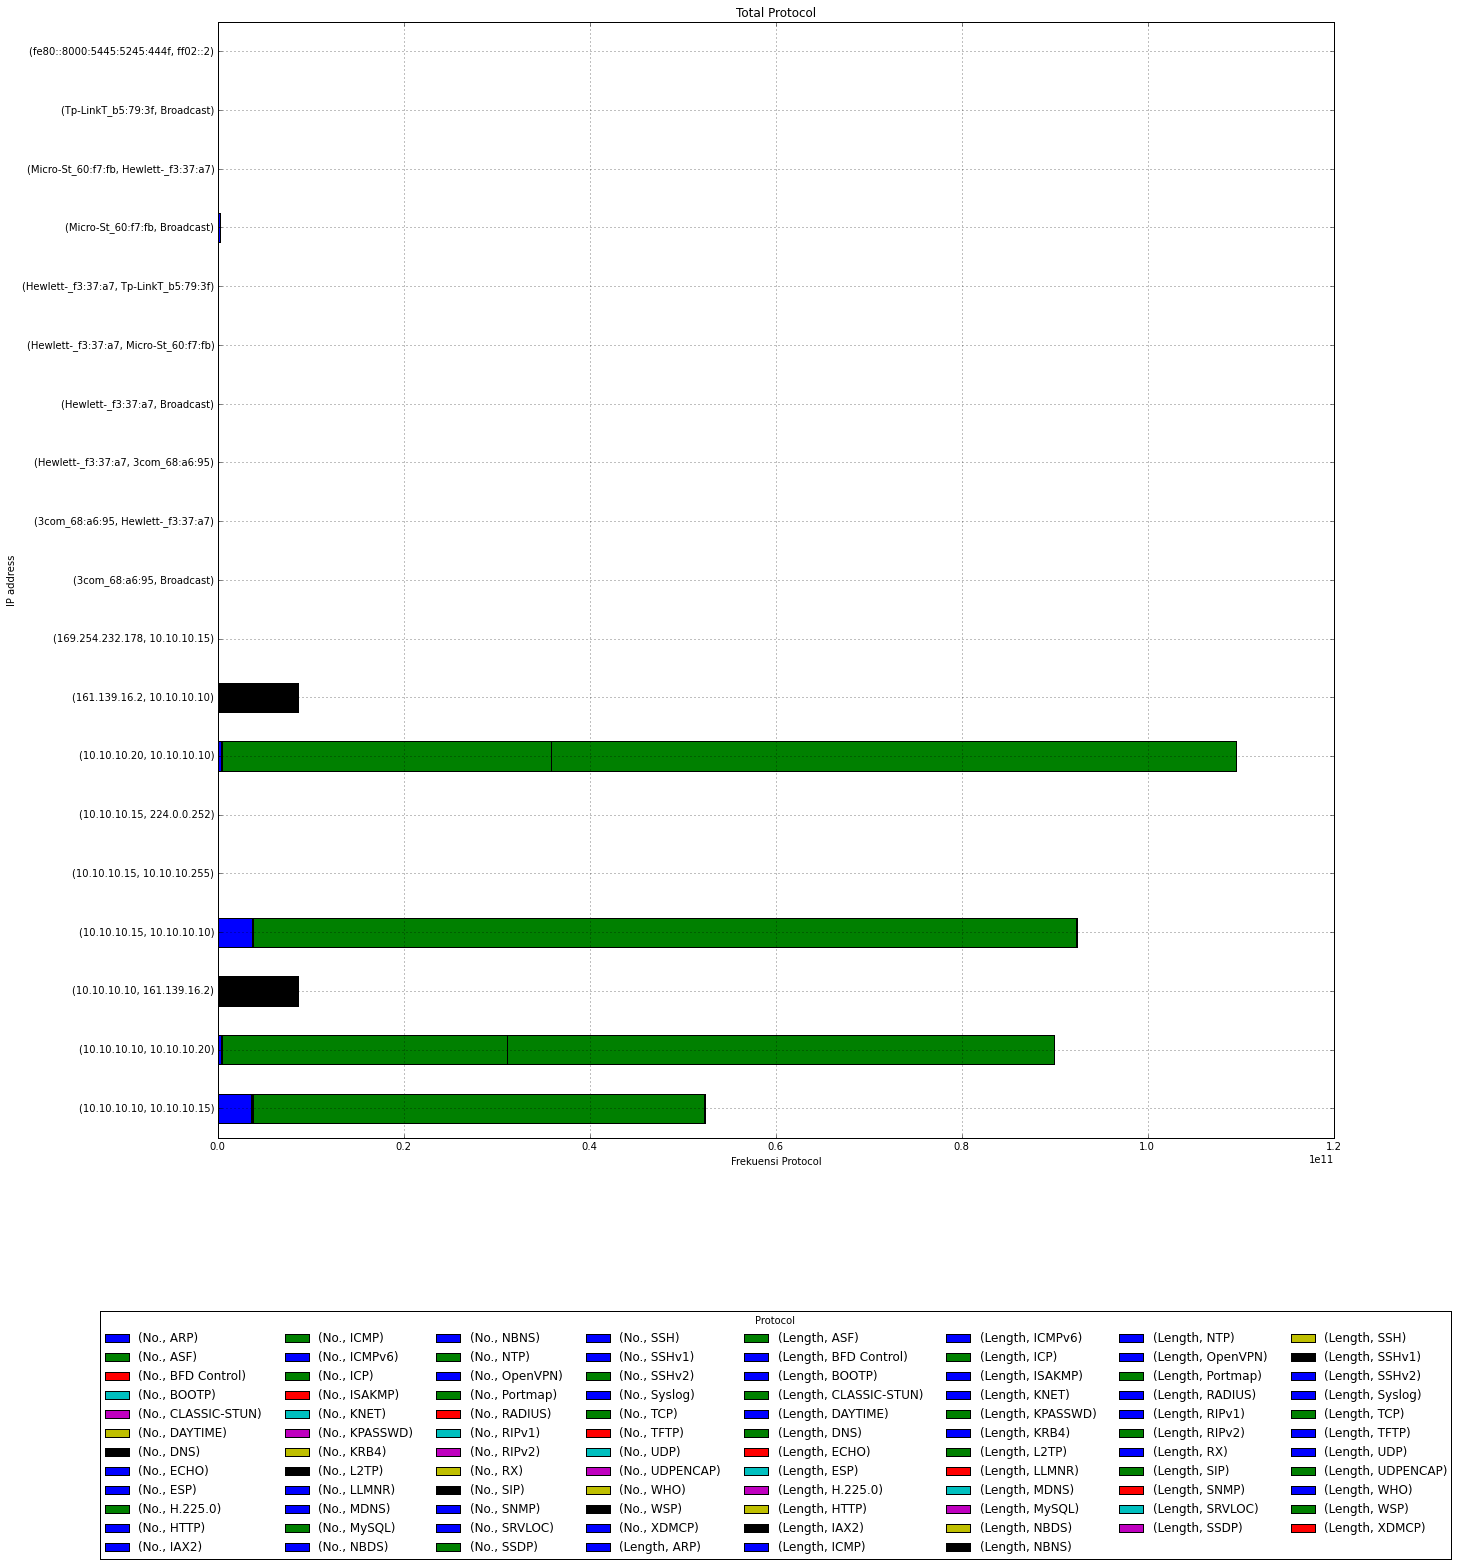

In [30]:
my_plot = category_group.unstack().plot(kind='barh',stacked=True,title="Total Protocol",figsize=(20, 20))
my_plot.set_xlabel("Frekuensi Protocol")
my_plot.set_ylabel("IP address")
patches, labels = my_plot.get_legend_handles_labels()
my_plot.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8, title="Protocol")